In [1]:
import pandas as pd
import pipeline as pl
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

Write functions for model training:

In [2]:
def estimate_weights_linear_reg(train_X, train_y):
    '''
    Estimate weights for linear regression
    '''
    u, s, v_t = la.svd(train_X)
    
    return u @ u.T @ train_y

- Read in pickle,
- Create train/test split,
- Normalize 'num_children' column, and
- Split train and test into feature and target dfs

In [3]:
chi_311 = pd.read_pickle("../pickle_files/chi_311.pkl")
chi_311['time_to_close_hr'] = chi_311['time_to_close_sec'] / 3600
chi_311 = chi_311.set_index('SR_NUMBER')
chi_311 = chi_311[chi_311['STATUS'] == 'Completed']
chi_311 = chi_311.drop(columns=['STATUS', 'CREATED_DATE', 'CLOSED_DATE', 'time_to_close_sec'])
chi_311['NUM_CHILDREN'] = chi_311['NUM_CHILDREN'].fillna(0)

In [4]:
train_311, test_311 = pl.create_train_test_split(chi_311)

In [5]:
cols_to_normalize = ['NUM_CHILDREN']
train_311_norm, scaler = pl.normalize(train_311, cols_to_normalize)
test_311_norm, scaler = pl.normalize(test_311, cols_to_normalize ,scaler)

In [6]:
train_feat_alt = np.array(train_311.iloc[:, :-1])
train_targ_alt = np.array(train_311.iloc[:, -1])

In [7]:
train_feat = train_311_norm.iloc[:, :-1]
features = list(train_feat.columns)
train_feat = np.array(train_feat)
train_targ = np.array(pd.DataFrame(train_311_norm.iloc[:, -1]))
test_feat = np.array(test_311_norm.iloc[:, :-1])
test_targ = np.array(pd.DataFrame(test_311_norm.iloc[:, -1]))

**LINEAR REGRESSION**

In [8]:
u, s, v_t = la.svd(train_feat, full_matrices=False)

In [14]:
train_311.shape

(826160, 109)

In [13]:
train_feat.shape

(826160, 108)

In [19]:
s.shape

(108,)

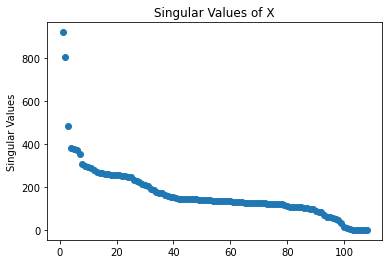

In [17]:
x_const = np.arange(1, 109)
ax1 = plt.subplot()
plt.scatter(x_const, s)
ax1.set_title('Singular Values of X')
ax1.set_ylabel('Singular Values')
plt.show()

In [9]:
# reg = LinearRegression().fit(train_feat, train_targ)

In [10]:
# reg.coef_

In [11]:
# weights = estimate_weights_linear_reg(train_feat, train_targ)